In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# data set

In [3]:
#train 데이터 만들기
path = 'C:\\Users\\wjssm\\Desktop\\boaz\mini\\h1b_train2.csv'
h1 = pd.read_csv(path)
h1 = h1[(h1.CASE_STATUS == 'CERTIFIED')|(h1.CASE_STATUS == 'DENIED')]
path = 'C:\\Users\\wjssm\\Desktop\\boaz\mini\\h1b_dev.csv'
h1_dev = pd.read_csv(path)
h1_dev = h1_dev[(h1_dev.CASE_STATUS == 'CERTIFIED')|(h1_dev.CASE_STATUS == 'DENIED')]
train = pd.concat([h1,h1_dev],axis = 0)

In [4]:
path = 'C:\\Users\\wjssm\\Desktop\\boaz\mini\\h1b_test_no_ylabel.csv'
test = pd.read_csv(path)

In [5]:
train.head(1)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,CERTIFIED,"international systems technologies, inc",computer programmers,programmer analyst,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.03635,37.36883


In [6]:
train.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [7]:
test.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [8]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ['column','dtype']
dtype_df.groupby(['dtype']).agg('count').reset_index()

,dtype,column
0,int64,1
1,float64,4
2,object,6


# label?

In [9]:
set(train.columns) - set(test.columns)

{'CASE_STATUS'}

In [10]:
train.rename(columns={'CASE_STATUS': 'label'},inplace=True)

In [11]:
train['label'].value_counts()/train.shape[0]*100

CERTIFIED    96.520998
DENIED        3.479002
Name: label, dtype: float64

In [12]:
train['label'].value_counts()

CERTIFIED    2092970
DENIED         75439
Name: label, dtype: int64

가정 : train과 test는 비율에 맞추어 나누어졌다.

In [13]:
print('예상되는 test셋의 DENIED수 :',int(test.shape[0]*0.0347))

예상되는 test셋의 DENIED수 : 18792


# missing value?

In [14]:
missing_df = train.isnull().sum().reset_index()
missing_df.columns = ['column','count']
missing_df['ratio'] = missing_df['count']/train.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
2,EMPLOYER_NAME,17,7.839849e-06
3,SOC_NAME,12747,5.878504e-03
4,JOB_TITLE,7,3.228173e-06
5,FULL_TIME_POSITION,1,4.611676e-07
6,PREVAILING_WAGE,48,2.213605e-05
9,lon,77512,3.574602e-02
10,lat,77512,3.574602e-02


In [23]:
test.isnull().sum()

ID                        0
EMPLOYER_NAME             1
SOC_NAME               3146
JOB_TITLE                 3
FULL_TIME_POSITION        0
PREVAILING_WAGE           5
YEAR                      0
WORKSITE                  0
lon                   19559
lat                   19559
dtype: int64

# 자료 표준화

In [15]:
#ID순으로 정렬
train = train.sort_values(['ID'])

In [16]:
#기본적인 텍스트 통일
train['EMPLOYER_NAME'] = train['EMPLOYER_NAME'].str.upper()
train['SOC_NAME'] = train['SOC_NAME'].str.upper()
train['JOB_TITLE'] = train['JOB_TITLE'].str.upper()

# EMPLOYER_NAME

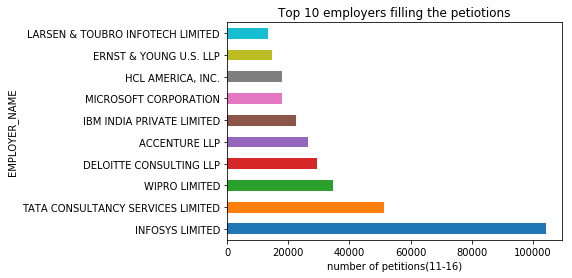

LARSEN & TOUBRO INFOTECH LIMITED      13415
ERNST & YOUNG U.S. LLP                14635
HCL AMERICA, INC.                     17805
MICROSOFT CORPORATION                 17868
IBM INDIA PRIVATE LIMITED             22593
ACCENTURE LLP                         26432
DELOITTE CONSULTING LLP               29355
WIPRO LIMITED                         34776
TATA CONSULTANCY SERVICES LIMITED     51441
INFOSYS LIMITED                      104225
Name: EMPLOYER_NAME, dtype: int64


In [26]:
train_emp = train['EMPLOYER_NAME'].value_counts().sort_values(ascending = False)
train_emp[:10].plot.barh()
plt.xlabel('number of petitions(11-16)')
plt.ylabel('EMPLOYER_NAME')
plt.title('Top 10 employers filling the petiotions')
plt.show()
print(train_emp[:10].sort_values())

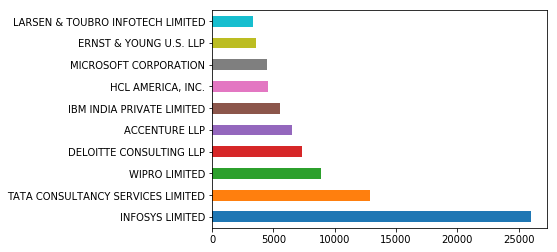

In [27]:
#train과 test가 '비'를 이룬다는 가정이 맞는듯 하다.
test_emp = test['EMPLOYER_NAME'].value_counts().sort_values(ascending = False)
test_emp[:10].plot.barh()
plt.show()

In [17]:
print(train[train.isnull()['EMPLOYER_NAME']]['label'].value_counts())
train[train.isnull()['EMPLOYER_NAME']].sort_values(['ID'])

CERTIFIED    11
DENIED        6
Name: label, dtype: int64


,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1232526,74904,DENIED,NaN,FINANCIAL ANALYSTS,BUSINESS FINANCIAL ANALYST,N,63066.0,2016.0,"TAMPA, FLORIDA",-82.457178,27.950575
946503,103771,DENIED,NaN,COMPUTER SYSTEMS ANALYSTS,BUSINESS ANALYST,N,55390.4,2016.0,"FAIRFAX, VIRGINIA",-77.306373,38.846224
510101,187388,CERTIFIED,NaN,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEMS ANALYST,N,64813.0,2016.0,"EDISON, NEW JERSEY",-74.412095,40.518715
322628,188030,CERTIFIED,NaN,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,Y,83678.0,2016.0,"REDMOND, WASHINGTON",-122.121512,47.673988
1734208,277184,CERTIFIED,NaN,COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,Y,73091.0,2016.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
116676,291833,DENIED,NaN,"SOFTWARE DEVELOPERS, APPLICATIONS","VICE PRESIDENT, SENIOR PRINCIPAL DEVELOPMENT M...",Y,118934.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
287843,393684,CERTIFIED,NaN,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE ENGINEER,Y,88421.0,2016.0,"TAMPA, FLORIDA",-82.457178,27.950575
619827,396132,CERTIFIED,NaN,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE ENGINEER,Y,90813.0,2016.0,"LONG ISLAND CITY, NEW YORK",-73.948542,40.744679
743505,506707,CERTIFIED,NaN,"COMPUTER OCCUPATIONS, ALL OTHER",IT PROJECT MANAGER,N,69305.6,2016.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814
1456977,582666,CERTIFIED,NaN,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",RESEARCH INTERN,N,40622.4,2016.0,"VAIL, COLORADO",NaN,NaN


# soc_name(soc_code)

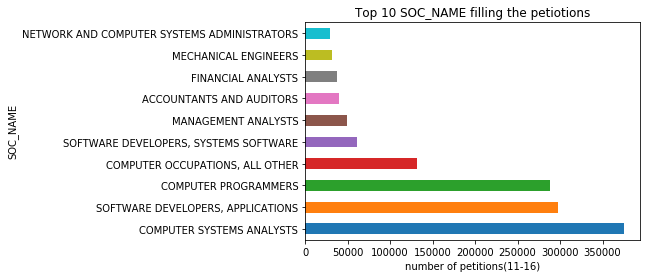

NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     28963
MECHANICAL ENGINEERS                            31807
FINANCIAL ANALYSTS                              37462
ACCOUNTANTS AND AUDITORS                        39818
MANAGEMENT ANALYSTS                             49667
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           60691
COMPUTER OCCUPATIONS, ALL OTHER                131892
COMPUTER PROGRAMMERS                           288529
SOFTWARE DEVELOPERS, APPLICATIONS              297635
COMPUTER SYSTEMS ANALYSTS                      375335
Name: SOC_NAME, dtype: int64


In [28]:
train_soc = train['SOC_NAME'].value_counts().sort_values(ascending = False)
train_soc[:10].plot.barh()
plt.xlabel('number of petitions(11-16)')
plt.ylabel('SOC_NAME')
plt.title('Top 10 SOC_NAME filling the petiotions')
plt.show()
print(train_soc[:10].sort_values())

In [29]:
train[train.isnull()['SOC_NAME']]['label'].value_counts()/train[train.isnull()['SOC_NAME']]['label'].shape[0]

CERTIFIED    0.969248
DENIED       0.030752
Name: label, dtype: float64

# YEAR

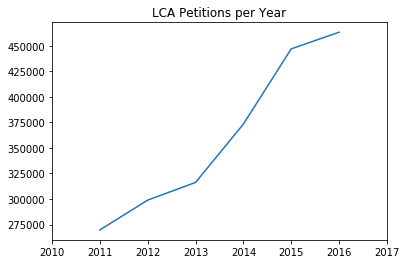

In [34]:
train['YEAR'].value_counts().sort_values().plot()
plt.xlim([2010,2017])
plt.title('LCA Petitions per Year')
plt.show()

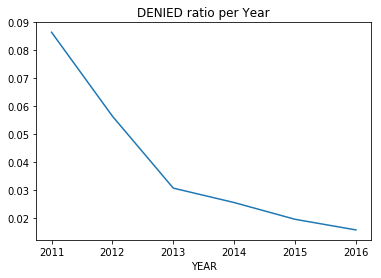

In [35]:
year_df = train.groupby(['YEAR','label'])['label'].count().unstack('label')
year_df['Dratio_Y'] = year_df['DENIED']/(year_df['CERTIFIED']+year_df['DENIED'])
year_df['Dratio_Y'].plot()
plt.title('DENIED ratio per Year')
plt.show()

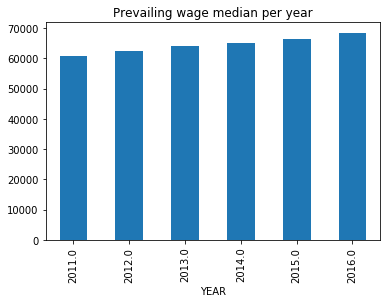

,PREVAILING_WAGE
,median
YEAR,
2011.0,60882.0
2012.0,62462.0
2013.0,63939.0
2014.0,64917.0
2015.0,66394.0
2016.0,68432.0


In [36]:
wage_df = train.loc[:,['PREVAILING_WAGE','YEAR']].groupby(['YEAR']).agg(['median'])
wage_df.plot(kind = 'bar',legend = None)
plt.title('Prevailing wage median per year')
plt.show()
wage_df

ID순서에 의미가 있지 않을까?

In [40]:
train[['ID','YEAR']].head()

,ID,YEAR
108460,19,2016.0
1280131,23,2016.0
690568,24,2016.0
260466,26,2016.0
460493,28,2016.0


In [41]:
train[['ID','YEAR']].tail()

,ID,YEAR
71944,3002361,2011.0
783628,3002368,2011.0
182343,3002379,2011.0
394479,3002384,2011.0
1002390,3002390,2011.0


In [18]:
train = train.sort_values(['ID'])

In [19]:
train[train.YEAR == 2016].tail(2)

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
432320,647798,CERTIFIED,"SIGMAWAYS, INC",NaN,SYSTEMS ENGINEER,Y,75421.0,2016.0,"FREMONT, CALIFORNIA",-121.988572,37.54827
682391,647803,CERTIFIED,"IRIS SOFTWARE, INC",NaN,NaN,Y,83740.8,2016.0,"FORT MILL, SOUTH CAROLINA",-80.945076,35.00737


In [20]:
train[train.YEAR == 2015].head(2)

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
341663,647805,CERTIFIED,UNIVERSITY OF OKLAHOMA,"ENGINEERING TEACHERS, POSTSECONDARY",ASSISTANT PROFESSOR,Y,42860.0,2015.0,"NORMAN, OKLAHOMA",-97.439478,35.222567
1540453,647808,CERTIFIED,FEDERAL HOME LOAN MORTGAGE CO,COMPUTER PROGRAMMERS,DEVELOPMENT SENIOR,Y,96907.0,2015.0,"MCLEAN, VIRGINIA",-77.177260,38.933868


ID는 2016~2011 순서대로 되있다.  
lD와 label과의 관계는 밝혀내지 못했다.

# WORKSITE

In [51]:
train['WORKSITE'].head(3) #도시,주

108460     SANTA CLARA, CALIFORNIA
1280131      SAN DIEGO, CALIFORNIA
690568     CHULA VISTA, CALIFORNIA
Name: WORKSITE, dtype: object

In [21]:
def state_extractor(worksite):
    return worksite.split(',')[1]
def city_extractor(worksite):
    return worksite.split(',')[0]

In [22]:
train['STATE'] = train['WORKSITE'].apply(state_extractor)
train['CITY'] = train['WORKSITE'].apply(city_extractor)

In [23]:
train = train.drop(['lon','lat'],1)

In [24]:
len(train['STATE'].unique())

53

# prevaling_wage

In [25]:
train[train.isnull()['PREVAILING_WAGE']]['label'].value_counts()

DENIED    48
Name: label, dtype: int64

In [65]:
train[train.PREVAILING_WAGE == 0]['label'].value_counts()

DENIED    19
Name: label, dtype: int64

In [26]:
train_wage = train[train.PREVAILING_WAGE > 0]

In [27]:
import math
logwage = train_wage['PREVAILING_WAGE'].apply(lambda x: math.log10(x))

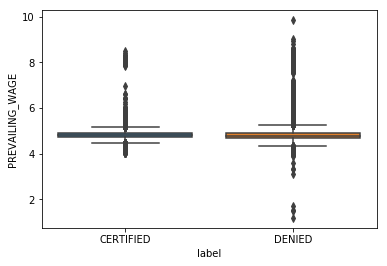

In [64]:
sns.boxplot(x =train_wage['label'], y = logwage)
plt.show()

In [66]:
#연봉 1만 달러(한화 약 1100만) 이하 전문직
train[train.PREVAILING_WAGE <= 10000]['label'].value_counts()

DENIED    30
Name: label, dtype: int64

In [67]:
#연봉 3억 달러(한화 약 3천 3백 억) 이상 전문직
train[train.PREVAILING_WAGE > 300000000]['label'].value_counts() 

DENIED       20
CERTIFIED     1
Name: label, dtype: int64

In [68]:
#암 연구 전문의
train[(train.PREVAILING_WAGE > 300000000)&(train.label == 'CERTIFIED')]

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,CITY
650617,2905943,CERTIFIED,INTEGRATED MEDICAL SERVICES,"INTERNISTS, GENERAL",RADIATION ONCOLOGIST,Y,306049120.0,2011.0,"CHANDLER, ARIZONA",ARIZONA,CHANDLER


In [71]:
train[(train.PREVAILING_WAGE < 10000000)&(train.PREVAILING_WAGE > 6500000)]['label'].value_counts()

DENIED       28
CERTIFIED     1
Name: label, dtype: int64

In [28]:
#Project Manager
train[(train.PREVAILING_WAGE < 10000000)&(train.PREVAILING_WAGE > 6500000)&(train.label == 'CERTIFIED')]

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,CITY
1537215,2610674,CERTIFIED,SELECT SOURCE INTERNATIONAL,"COMPUTER OCCUPATIONS, ALL OTHER",PROJECT MANAGER,Y,9062600.0,2012.0,"BROOKLYN PARK, MINNESOTA",MINNESOTA,BROOKLYN PARK


PREVAILING_WAG가 결측값,0,너무 낮은 값, 너무 높은 값 이면 DENIED다.  
특이하게 6,500,000~10,000,000 구간에서도 DENIED가 많이 분포한다.  
그 외 wage 값 자체만으로는 label구별에 의미가 없어 보인다

# Full time

In [75]:
train['FULL_TIME_POSITION'].value_counts()*100/train['FULL_TIME_POSITION'].shape[0]

Y    85.944211
N    14.055743
Name: FULL_TIME_POSITION, dtype: float64

In [76]:
# FULL = Y
train[train.FULL_TIME_POSITION == 'Y']['label'].value_counts()*100/train[train.FULL_TIME_POSITION == 'Y']['label'].shape[0]

CERTIFIED    96.512705
DENIED        3.487295
Name: label, dtype: float64

In [77]:
# FULL =N
train[train.FULL_TIME_POSITION == 'N']['label'].value_counts()*100/train[train.FULL_TIME_POSITION == 'N']['label'].shape[0]

CERTIFIED    96.572021
DENIED        3.427979
Name: label, dtype: float64

Full time의 유무는 label과 크게 관련 없어 보인다.

# 이 데이터 셋으로   
# 100% 정답을 맞출 수 없는 근본적인 한계 :   
- 같은 feature를 갖고도 label이 다르게 붙는 경우가 존재
- LCA 신청서에는 이것보다 많은 자료가 기재되어 있을 것이다.

In [82]:
#EX
train[(train.EMPLOYER_NAME == 'FOUR SEASONS HEATING AND AIR CONDITIONING')&(train.SOC_NAME == 'COMPUTER PROGRAMMERS')]

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,CITY
501696,1435520,DENIED,FOUR SEASONS HEATING AND AIR CONDITIONING,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,50211.0,2014.0,"CHICAGO, ILLINOIS",ILLINOIS,CHICAGO
232158,1447331,CERTIFIED,FOUR SEASONS HEATING AND AIR CONDITIONING,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,50211.0,2014.0,"CHICAGO, ILLINOIS",ILLINOIS,CHICAGO
1702640,1483030,CERTIFIED,FOUR SEASONS HEATING AND AIR CONDITIONING,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,50211.0,2014.0,"CHICAGO, ILLINOIS",ILLINOIS,CHICAGO


# EDA report  
- 5개년 동안 압도적으로 LCA를 많이 제출한 회사도 있고, 1개만 제출한 회사도 많다.
- soc_name을 표준 이름으로 기재하지 않은 회사들이 많다.
- soc_name,job_title : 내용은 같으나 철자가 달라 구별되어 판단되는 경우 존재
- FULL_TITME_POSITION : 크게 의미 있는 변수는 아닌 듯 하다.
- PREVALING_WAGE : 값을 이용해 DENIED를 골라낼 수 있는 경우 존재 
- state : 미국의 모든 주는 다 있는 듯 하다.
- YEAR : ID는 2016~2011순이다. 해가 갈 수록 LCA접수량이 증가하고 , CERTIFED 비율도 높아진다.
- 예측 정확도을 높이고 싶으면 추가적인 정보가 필요해 보인다.

# train 전처리

# 결측값처리 
- 각 feature마다 결측값의 의미를 확인했기에 결측값 없는 데이터만으로 학습하자

In [84]:
train.isnull().sum()

ID                        0
label                     0
EMPLOYER_NAME            17
SOC_NAME              12747
JOB_TITLE                 7
FULL_TIME_POSITION        1
PREVAILING_WAGE          48
YEAR                      0
WORKSITE                  0
STATE                     0
CITY                      0
dtype: int64

In [30]:
train2 = train.dropna()

# factor 처리

In [31]:
emp_count_df = pd.DataFrame(train2['EMPLOYER_NAME'].value_counts()).reset_index()
emp_count_df.columns = ['EMPLOYER_NAME','COUNT']
train2_1 = pd.merge(train2,emp_count_df,on = 'EMPLOYER_NAME', how = 'inner')
emp_df = train2.groupby(['EMPLOYER_NAME','label'])['label'].count().unstack('label')
emp_df = emp_df.reset_index()
emp_df['CERTIFIED'] = emp_df['CERTIFIED'].fillna(0)
emp_df['DENIED'] =emp_df['DENIED'].fillna(0)
emp_df['Cratio_E'] = emp_df['CERTIFIED']/(emp_df['CERTIFIED']+emp_df['DENIED'])
emp_df = emp_df[['EMPLOYER_NAME','Cratio_E']]
train3 = pd.merge(train2_1,emp_df,on = 'EMPLOYER_NAME',how = 'inner')

In [32]:
soc_df = train3.groupby(['SOC_NAME','label'])['label'].count().unstack('label')
soc_df = soc_df.reset_index()
soc_df['CERTIFIED'] = soc_df['CERTIFIED'].fillna(0)
soc_df['DENIED'] = soc_df['DENIED'].fillna(0)
soc_df['Cratio_SOC'] = soc_df['CERTIFIED']/(soc_df['CERTIFIED']+soc_df['DENIED'])
soc_df = soc_df[['SOC_NAME','Cratio_SOC']]
train4 = pd.merge(train3,soc_df,on = 'SOC_NAME',how = 'inner')

In [33]:
job_df = train4.groupby(['JOB_TITLE','label'])['label'].count().unstack('label')
job_df = job_df.reset_index()
job_df['CERTIFIED'] = job_df['CERTIFIED'].fillna(0)
job_df['DENIED'] = job_df['DENIED'].fillna(0)
job_df['Cratio_J'] = job_df['CERTIFIED']/(job_df['CERTIFIED']+job_df['DENIED'])
job_df = job_df[['JOB_TITLE','Cratio_J']]
train5 = pd.merge(train4,job_df,on = 'JOB_TITLE',how = 'inner')

In [34]:
state_df = train5.groupby(['STATE','label'])['label'].count().unstack('label')
state_df = state_df.reset_index()
state_df['CERTIFIED'] = state_df['CERTIFIED'].fillna(0)
state_df['DENIED'] = state_df['DENIED'].fillna(0)
state_df['Cratio_S'] = state_df['CERTIFIED']/(state_df['CERTIFIED']+state_df['DENIED'])
state_df = state_df[['STATE','Cratio_S']]
train6 = pd.merge(train5,state_df,on = 'STATE',how = 'inner')

In [35]:
label_dict = {'CERTIFIED': 0, 'DENIED': 1}
train6['label'] = train6['label'].apply(lambda x : label_dict[x])

In [36]:
FTP_dict = {'Y': 1, 'N': 0}
train6['FULL_TIME_POSITION'] = train6['FULL_TIME_POSITION'].apply(lambda x : FTP_dict[x])

In [37]:
train6.head(2)

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,CITY,COUNT,Cratio_E,Cratio_SOC,Cratio_J,Cratio_S
0,19,0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.0,2016.0,"SANTA CLARA, CALIFORNIA",CALIFORNIA,SANTA CLARA,1,1.0,0.842002,0.786207,0.964762
1,23,0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,99986.0,2016.0,"SAN DIEGO, CALIFORNIA",CALIFORNIA,SAN DIEGO,1,1.0,0.842002,0.786207,0.964762


In [38]:
train7 = train6[(train6.PREVAILING_WAGE > 10000)&(train6.PREVAILING_WAGE<300000000)].copy()

In [39]:
train8 = train7[(train7.PREVAILING_WAGE < 6500000)|(train7.PREVAILING_WAGE > 10000000)].copy()

In [40]:
train8['YEAR'] = train8['YEAR'].astype(int)

# CERTIFIED vs DENIED  data 비율 조정

In [41]:
train2_C = train8[train8.label == 0]
train2_D = train8[train8.label == 1]

In [114]:
print('CERTIFIED',len(train2_C))
print('DENIED',len(train2_D))

CERTIFIED 2080601
DENIED 74916


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#CERTIFIED row수를 train_size 비율 만큼 줄인다.
Certified,Certified_extra,y_certified,y_y_certified_extra = train_test_split(train2_C,train2_C.label,train_size = 0.1,random_state = 1)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
train_df = Certified.append(train2_D)

In [45]:
#처리 전
train['label'].value_counts()*100/train['label'].shape[0]

CERTIFIED    96.520998
DENIED        3.479002
Name: label, dtype: float64

In [46]:
#처리 후
train_df['label'].value_counts()*100/train_df['label'].shape[0]

0    73.52567
1    26.47433
Name: label, dtype: float64

# feature 선택과 조작

In [47]:
F = ['label','COUNT','STATE','PREVAILING_WAGE','YEAR','Cratio_E','Cratio_SOC','Cratio_J','Cratio_S']

In [48]:
train_df2 = train_df[F].copy()

In [49]:
train_df2.head(1)

,label,COUNT,STATE,PREVAILING_WAGE,YEAR,Cratio_E,Cratio_SOC,Cratio_J,Cratio_S
486848,0,51441,ARIZONA,43555.0,2014,0.998075,0.979639,0.965988,0.969902


In [132]:
import math
train_df2['logcount'] = train_df2['COUNT'].apply(lambda x : math.log2(x))

In [134]:
train_df2['logwage'] = train_df2['PREVAILING_WAGE'].apply(lambda x : math.log10(x))

In [160]:
train_df2['assets'] = train_df2['COUNT']*(train_df2['Cratio_E']+0.001)*train_df2['PREVAILING_WAGE']

In [161]:
train_df2['logassets'] = train_df2['assets'].apply(lambda x: math.log10(x))

In [375]:
train_df2.head(1)

,label,COUNT,STATE,PREVAILING_WAGE,YEAR,Cratio_E,Cratio_SOC,Cratio_J,Cratio_S
483866,0,11118,TEXAS,68432.0,2016,0.995593,0.965486,0.987201,0.967577


In [50]:
F_1 = ['label','YEAR','Cratio_SOC','Cratio_J','Cratio_E','Cratio_S']
train_df3 = train_df2[F_1]

In [51]:
train_df4 = pd.get_dummies(train_df3,columns = ['YEAR'])

# x_train, y_train 준비 

In [52]:
x_train = train_df4.drop(['label'],1)
y_train = train_df4['label']

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X_scaler = StandardScaler()

In [55]:
x_train2 = X_scaler.fit_transform(x_train)

# moding test

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(
x_train,y_train , test_size=0.25, random_state=41)

In [58]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
x_train2,y_train,test_size=0.25, random_state = 35)

### Xgboost

In [59]:
from xgboost import XGBClassifier

In [60]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
y_xg = model.predict(X_test)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
print(confusion_matrix(Y_test,y_xg))
print(classification_report(Y_test,y_xg))
print(f1_score(Y_test,y_xg))

[[49828  2319]
 [ 4179 14418]]
             precision    recall  f1-score   support

          0       0.92      0.96      0.94     52147
          1       0.86      0.78      0.82     18597

avg / total       0.91      0.91      0.91     70744

0.816097809475293


In [136]:
model = XGBClassifier(learning_rate=0.3,max_depth=4)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [137]:
y_xg = model.predict(X_test)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
print(confusion_matrix(Y_test,y_xg))
print(classification_report(Y_test,y_xg))
print(f1_score(Y_test,y_xg))

[[49893  2254]
 [ 4195 14402]]
             precision    recall  f1-score   support

          0       0.92      0.96      0.94     52147
          1       0.86      0.77      0.82     18597

avg / total       0.91      0.91      0.91     70744

0.8170652143080022


In [382]:
import sklearn.linear_model as linear_model
clf2 = linear_model.LogisticRegression()
clf2.fit(X_train2,Y_train2)
Y_pred2 = clf2.predict(X_test2)

In [383]:
print(confusion_matrix(Y_test2,Y_pred2))
print(classification_report(Y_test2,Y_pred2))
print(f1_score(Y_test2,Y_pred2))

[[50729  1271]
 [ 6234 12510]]
             precision    recall  f1-score   support

          0       0.89      0.98      0.93     52000
          1       0.91      0.67      0.77     18744

avg / total       0.90      0.89      0.89     70744

0.7692544196771715


In [384]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
clf3.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [385]:
Y_pred3 = clf3.predict(X_test)

In [386]:
print(confusion_matrix(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
print(f1_score(Y_test,Y_pred3))

[[48963  3184]
 [ 4662 13935]]
             precision    recall  f1-score   support

          0       0.91      0.94      0.93     52147
          1       0.81      0.75      0.78     18597

avg / total       0.89      0.89      0.89     70744

0.7803225445178631


# test set 전처리

In [387]:
train8.head(1)

,ID,label,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,CITY,COUNT,Cratio_E,Cratio_SOC,Cratio_J,Cratio_S
0,19,0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.0,2016,"SANTA CLARA, CALIFORNIA",CALIFORNIA,SANTA CLARA,1,1.0,0.842002,0.786207,0.964762


In [302]:
path = 'C:/Users/MSI/Desktop/mini/BOAZ Mini Project (3)/h1b_test_no_ylabel.csv'
test = pd.read_csv(path)

In [63]:
test.head(1)

,ID,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,2415925,ALBERT EINSTEIN MEDICAL CENTER,Healthcare Practitioners and Technical Workers...,MEDICAL RESIDENT - PGY 3,Y,43971.0,2012,"PHILADELPHIA, PENNSYLVANIA",-75.165222,39.952584


In [64]:
test.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [65]:
#문자 처리
test['EMPLOYER_NAME'] = test['EMPLOYER_NAME'].str.upper()
test['SOC_NAME'] = test['SOC_NAME'].str.upper()
test['JOB_TITLE'] = test['JOB_TITLE'].str.upper()

In [66]:
test1 = test.drop(['lon','lat'],1)

In [67]:
test1['STATE'] = test1['WORKSITE'].apply(state_extractor)

In [68]:
test1.isnull().sum()

ID                       0
EMPLOYER_NAME            1
SOC_NAME              3146
JOB_TITLE                3
FULL_TIME_POSITION       0
PREVAILING_WAGE          5
YEAR                     0
WORKSITE                 0
STATE                    0
dtype: int64

In [69]:
test_nan = test1[test1.isnull()['EMPLOYER_NAME']]['ID']

In [70]:
t_w1 = test1[test1.isnull()['PREVAILING_WAGE']]
print('wage결측값:',t_w1.shape[0])
t_w2 = test1[test1.PREVAILING_WAGE <= 10000]
print('저임금:',t_w2.shape[0])
t_w3 = test1[test1.PREVAILING_WAGE >= 300000000]
print('고임금',t_w3.shape[0])
t_w4 = test1[(test.PREVAILING_WAGE < 10000000)&(test.PREVAILING_WAGE > 6500000)]
print('특정 임금',t_w4.shape[0])

wage결측값: 5
저임금: 10
고임금 4
특정 임금 9


In [71]:
test_nan1 = pd.concat([test_nan,t_w1['ID'],t_w2['ID'],t_w3['ID'],t_w4['ID']],axis = 0) 
test_nan1 = pd.DataFrame(test_nan1)

In [72]:
print(test_nan1.shape[0])

29


In [73]:
test_nan1['label'] = np.ones(29)

In [74]:
test1_1 = test1[(test1.PREVAILING_WAGE>10000)&(test1.PREVAILING_WAGE<300000000)].dropna(subset=['EMPLOYER_NAME']).copy()

In [75]:
test_df = test1_1[(test1_1.PREVAILING_WAGE >= 10000000)|(test1_1.PREVAILING_WAGE <= 6500000)]

In [76]:
len(test_df)

541531

In [77]:
test_df.isnull().sum()

ID                       0
EMPLOYER_NAME            0
SOC_NAME              3146
JOB_TITLE                3
FULL_TIME_POSITION       0
PREVAILING_WAGE          0
YEAR                     0
WORKSITE                 0
STATE                    0
dtype: int64

In [78]:
emp2dratio_e = {}
df1 = train6[['EMPLOYER_NAME','Cratio_E']]
for i in range(df1.shape[0]):
    emp2dratio_e[df1['EMPLOYER_NAME'].iloc[i]] = df1['Cratio_E'].iloc[i]

In [79]:
soc2dratio_soc = {}
df2 = train6[['SOC_NAME','Cratio_SOC']]
for i in range(df2.shape[0]):
    soc2dratio_soc[df2['SOC_NAME'].iloc[i]] = df2['Cratio_SOC'].iloc[i]

In [80]:
job2dratio_J = {}
df3 = train6[['JOB_TITLE','Cratio_J']]
for i in range(df3.shape[0]):
    job2dratio_J[df3['JOB_TITLE'].iloc[i]] = df3['Cratio_J'].iloc[i]

In [81]:
state2dratio_S = {}
df4 = train6[['STATE','Cratio_S']]
for i in range(df4.shape[0]):
    state2dratio_S[df4['STATE'].iloc[i]] = df4['Cratio_S'].iloc[i]

In [82]:
test_emp_count_df = pd.DataFrame(test_df['EMPLOYER_NAME'].value_counts()).reset_index()
test_emp_count_df.columns = ['EMPLOYER_NAME','COUNT']
test_df_1 = pd.merge(test_df,test_emp_count_df,on = 'EMPLOYER_NAME', how = 'inner')

In [83]:
test_df_1.head(1)

,ID,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,COUNT
0,2415925,ALBERT EINSTEIN MEDICAL CENTER,HEALTHCARE PRACTITIONERS AND TECHNICAL WORKERS...,MEDICAL RESIDENT - PGY 3,Y,43971.0,2012,"PHILADELPHIA, PENNSYLVANIA",PENNSYLVANIA,30


In [84]:
df = test_df_1['EMPLOYER_NAME']
df_1 = test_df_1['COUNT']
e = []
for i in range(df.shape[0]):
    try:
        e.append(emp2dratio_e[df.iloc[i]])
    except:
        e.append((8*df_1.iloc[i])/10)

In [85]:
test_df_1['Cratio_E'] = e

In [86]:
df = test_df['SOC_NAME']
cs = []
for i in range(df.shape[0]):
    try:
        cs.append(soc2dratio_soc[df.iloc[i]])
    except:
        cs.append(0.9)

In [87]:
test_df_1['Cratio_SOC'] = cs

In [88]:
df = test_df['JOB_TITLE']
j = []
for i in range(df.shape[0]):
    try:
        j.append(job2dratio_J[df.iloc[i]])
    except:
        j.append(0.8)

In [89]:
test_df_1['Cratio_J'] = j

In [90]:
df = test_df['STATE']
s = []
for i in range(df.shape[0]):
    try:
        s.append(state2dratio_S[df.iloc[i]])
    except:
        s.append(0.9)

In [91]:
test_df_1['Cratio_S'] = s

In [92]:
test_df_1['FULL_TIME_POSITION'] = test_df_1['FULL_TIME_POSITION'].apply(lambda x : FTP_dict[x])

In [93]:
test_df_1.head(1)

,ID,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,COUNT,Cratio_E,Cratio_SOC,Cratio_J,Cratio_S
0,2415925,ALBERT EINSTEIN MEDICAL CENTER,HEALTHCARE PRACTITIONERS AND TECHNICAL WORKERS...,MEDICAL RESIDENT - PGY 3,1,43971.0,2012,"PHILADELPHIA, PENNSYLVANIA",PENNSYLVANIA,30,0.992308,0.936815,1.0,0.97243


In [94]:
F

['label',
 'COUNT',
 'STATE',
 'PREVAILING_WAGE',
 'YEAR',
 'Cratio_E',
 'Cratio_SOC',
 'Cratio_J',
 'Cratio_S']

In [95]:
F_1

['label', 'YEAR', 'Cratio_SOC', 'Cratio_J', 'Cratio_E', 'Cratio_S']

In [96]:
tF = ['ID',
 'YEAR',
 'Cratio_SOC',
 'Cratio_J',
  'Cratio_E',
 'Cratio_S']

In [97]:
test_df2 = test_df_1[tF]

In [98]:
test_df3 = test_df2.sort_values(['ID'])

In [99]:
test_dfID = pd.DataFrame(test_df3['ID'])

In [100]:
test_df4 = test_df3.drop(['ID'],1)

In [101]:
test_df5 = pd.get_dummies(test_df4,columns = ['YEAR'])

In [102]:
x_test = test_df5.copy()

In [103]:
x_train.head()

,Cratio_SOC,Cratio_J,Cratio_E,Cratio_S,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016
486848,0.979639,0.965988,0.998075,0.969902,0,0,0,1,0,0
185744,0.984621,0.981938,0.984745,0.964762,0,0,1,0,0,0
652901,0.984621,1.000000,0.964286,0.951717,1,0,0,0,0,0
1767012,0.969758,0.998150,0.997525,0.970307,0,0,0,1,0,0
1104543,0.970591,0.972966,0.968750,0.973284,0,1,0,0,0,0


In [104]:
x_test.head()

,Cratio_SOC,Cratio_J,Cratio_E,Cratio_S,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016
476556,0.981873,0.984134,1.0,0.942625,0,0,0,0,0,1
490978,0.975708,0.991701,1.0,0.967577,0,0,0,0,0,1
515217,0.982354,0.985199,1.0,0.951717,0,0,0,0,0,1
377523,0.974954,1.000000,1.0,0.974847,0,0,0,0,0,1
403095,0.975708,0.959601,0.8,0.951717,0,0,0,0,0,1


In [105]:
num1 = 0; num2 = 0
for i in range(len(x_train.columns.values)):
    if x_train.columns.values[i] == x_test.columns.values[i]:
        num1 += 1
    else:
        num2 += 1
if num1 == len(x_train.columns.values):
    print('x_train,x_test 준비 완료')
else:
    print('train,test 다시 준비 필요')

x_train,x_test 준비 완료


In [106]:
x_test2 = X_scaler.fit_transform(x_test)

# prediction

In [107]:
#xgboost
y_pred3 = model.predict(x_test)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [108]:
test_dfID3 = test_dfID.copy()
test_dfID3['label'] = y_pred3
ans3 = pd.concat([test_dfID3,test_nan1],axis=0)
ans3['label'].value_counts()*100/ans3['label'].shape[0]

0.0    88.473669
1.0    11.526331
Name: label, dtype: float64

In [109]:
test_real_ID = test[['ID','EMPLOYER_NAME']]
ans3r = pd.merge(test_real_ID, ans3, left_on = None )

In [110]:
num1 = 0; num2 = 0
for i in range(len(test['ID'])):
    if ans3r['ID'].iloc[i] == test['ID'].iloc[i]:
        num1 += 1
    else:
        num2 +=1
if num1 == len(test['ID']):
    print('test 완료')
else:
    print('정렬 다시',num2)

test 완료


In [111]:
path = './test.csv'
ans3r.to_csv(path,index = False)